In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Expected Coverage Probability (ECP) versus credibility level
- First, given a true parameter $\theta_0$ (prior fixed).
- For a given credible interval $\alpha \in [0, 1]$:
  - We make $N$ simulations. 
  - $C_\alpha = 0$
  - For each $k$-th simulation:
      - Let $\mathcal{P}(\theta|\mathcal{D}_k, \theta_0)$ be the parameter posterior of some data realisation $\mathcal{D}_k$ for the underlying parameter $\theta_0$
      - we compute the credible interval corresponding to the credibility level $\alpha$, e.g. $\mathcal{P}(\theta|\mathcal{D}_k, \theta_0) =\mathcal{N}(\theta|0, 1)$ then, considering $\alpha = 0.5$ we have $[\theta_1, \theta_2] = [-0.67, +0.67]$
      - If $\theta_0$ in $[\theta_1, \theta_2]$, $C_\alpha = C_\alpha + 1$
  - $C_\alpha = C_\alpha/N$
  - Do this for all $\alpha$ credible interval.

In [2]:
cred = 0.5 #%
lower_coverage = (1 - cred) / 2
upper_coverage = 1 - lower_coverage
ci_lower = norm.ppf(lower_coverage, loc=0, scale=1)
ci_upper = norm.ppf(upper_coverage, loc=0, scale=1)
print('for a credibility level of ', str(cred*100), '% the confidence interval is [', str(ci_lower), str(ci_upper), ']')

for a credibility level of  50.0 % the confidence interval is [ -0.6744897501960817 0.6744897501960817 ]


In [3]:
cred = 0.9 #%
lower_coverage = (1 - cred) / 2
upper_coverage = 1 - lower_coverage
ci_lower = norm.ppf(lower_coverage, loc=0, scale=1)
ci_upper = norm.ppf(upper_coverage, loc=0, scale=1)
print('for a credibility level of ', str(cred*100), '% the confidence interval is [', str(ci_lower), str(ci_upper), ']')

for a credibility level of  90.0 % the confidence interval is [ -1.6448536269514729 1.6448536269514722 ]


In [4]:
credibility_levels = np.linspace(0.05, 0.99, 20)
true_theta = 0
n_sim = 1000
def ecp_(sigma):
    ecp= []
    for cred in credibility_levels:
        lower_coverage = (1 - cred) / 2
        upper_coverage = 1 - lower_coverage
        count = 0
        
        for i in range(n_sim):
            # Simulate data from known model
            data = np.random.normal(loc=true_theta, scale=1, size=10)
            posterior_mean = np.mean(data)
            posterior_sd = 1 / np.sqrt(len(data))
            posterior_sd *= sigma
            
            ci_lower = norm.ppf(lower_coverage, loc=posterior_mean, scale=posterior_sd)
            ci_upper = norm.ppf(upper_coverage, loc=posterior_mean, scale=posterior_sd)
            
            if ci_lower <= true_theta <= ci_upper:
                count += 1
        
        ecp.append(count / n_sim)
    return ecp

In [5]:
ecp = ecp_(1)

In [6]:
ecp_over = ecp_(1.2)

In [7]:
ecp_under = ecp_(0.8)

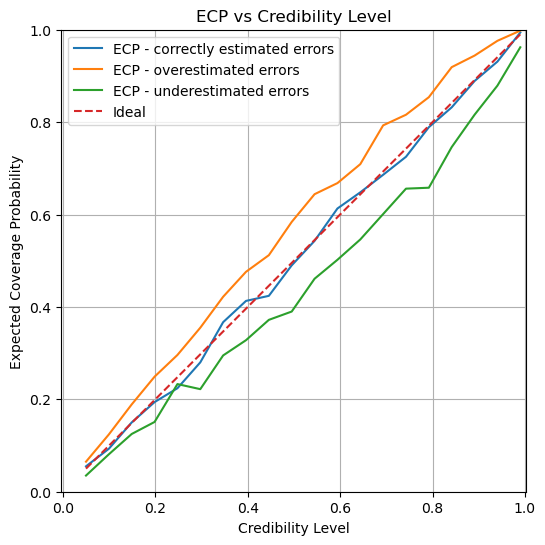

In [8]:
# Plot
plt.figure(figsize=(6, 6))
plt.axis('equal')
plt.plot(credibility_levels, ecp, label="ECP - correctly estimated errors")
plt.plot(credibility_levels,ecp_over, label="ECP - overestimated errors")
plt.plot(credibility_levels, ecp_under, label="ECP - underestimated errors")
plt.plot(credibility_levels, credibility_levels, '--', label="Ideal")
plt.xlabel("Credibility Level")
plt.ylabel("Expected Coverage Probability")
plt.title("ECP vs Credibility Level")
plt.legend()
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()